In [ ]:
import pandas as pd
import os
from google.colab import drive

# Montar Google Drive para acceder a los archivos
drive.mount('/content/drive')
print("Google Drive montado correctamente.")

# Definir la ruta de la carpeta 'datos'
folder_path = '/content/drive/MyDrive/CIENCIA DE DATOS /CORTE 2/TALLER 6 Datos colombia /COLOMBIA/datos'
print(f"La carpeta de datos se encuentra en: {folder_path}")

# Función para limpiar y cargar los datos
def load_and_clean_data(file_name, sheet_name=None, header_row=0):
    """
    Carga un archivo Excel, seleccionando una hoja y una fila de encabezado si es necesario,
    y elimina filas y columnas vacías.

    Args:
        file_name (str): El nombre del archivo.
        sheet_name (str, optional): El nombre de la hoja si los datos no están en la primera.
        header_row (int, optional): El índice de la fila donde se encuentran los encabezados (empezando en 0).

    Returns:
        pd.DataFrame: El dataframe limpio o None si hay un error.
    """
    try:
        # Cargar el archivo, especificando la hoja y la fila de encabezado
        df = pd.read_excel(os.path.join(folder_path, file_name), sheet_name=sheet_name, header=header_row)
        print(f"Archivo '{file_name}' cargado exitosamente.")

        # Eliminar filas y columnas completamente vacías
        df.dropna(how='all', axis=0, inplace=True)
        df.dropna(how='all', axis=1, inplace=True)

        print("Filas y columnas vacías eliminadas.")
        return df
    except FileNotFoundError:
        print(f"Error: El archivo '{file_name}' no se encontró.")
        return None
    except ValueError as e:
        print(f"Error: Problema al leer el archivo. Revisa el nombre de la hoja o la fila de encabezado. Detalle: {e}")
        return None

# --- Limpieza de Base Agrícola EVA 2007-2018 ---
# Los datos están en la hoja 'FINAL' y los encabezados en la fila 3 (índice 2)
df_2018 = load_and_clean_data('Base Agrícola EVA 2007-2018_MADR.xlsx', sheet_name='FINAL', header_row=2)

# --- Limpieza de Base Agrícola 2019-2024 ---
# Los datos están en la hoja 'BasePagina' y los encabezados en la fila 8 (índice 7)
df_2024 = load_and_clean_data('20250617_BaseAgricola20192024.xlsx', sheet_name='BasePagina', header_row=7)

# Verificar si los dataframes se cargaron y limpiaron correctamente
if df_2018 is not None and df_2024 is not None:
    print("\n¡Los dataframes limpios están listos!")

    # Renombrar las columnas para que coincidan ANTES de guardar o concatenar
    column_mapping_2018 = {
        'CÓD. \nDEP.': 'Código Dane departamento',
        'CÓD. MUN.': 'Código Dane municipio',
        'GRUPO \nDE CULTIVO': 'Grupo cultivo',
        'SUBGRUPO \nDE CULTIVO': 'Subgrupo',
        'Área Sembrada\n(ha)': 'Área sembrada (ha)',
        'Área Cosechada\n(ha)': 'Área cosechada (ha)',
        'Producción\n(t)': 'Producción (t)',
        'Rendimiento\n(t/ha)': 'Rendimiento (t/ha)',
        'NOMBRE \nCIENTIFICO': 'Nombre científico del cultivo',
        'ESTADO FISICO PRODUCCION': 'Estado físico del cultivo',
        'CICLO DE CULTIVO': 'Ciclo del cultivo',
        'NOMBRE \nDEP.': 'Departamento', # Added mapping for Departamento
        'NOMBRE \nMUN.': 'Municipio', # Added mapping for Municipio
        'CULTIVO': 'Cultivo' # Added mapping for Cultivo
    }
    df_2018.rename(columns=column_mapping_2018, inplace=True)


    # Guardar los archivos limpios en la carpeta 'datos' con los nombres solicitados
    output_path_2018 = os.path.join(folder_path, 'datos_2006_2018.xlsx')
    output_path_2024 = os.path.join(folder_path, 'datos_2019_2024.xlsx')

    df_2018.to_excel(output_path_2018, index=False)
    df_2024.to_excel(output_path_2024, index=False)

    print("\nArchivos limpios y renombrados guardados en Google Drive:")
    print(f"1. {output_path_2018}")
    print(f"2. {output_path_2024}")

    # Mostrar las primeras filas y los nombres de las columnas para verificar
    print("\nPrimeras 5 filas del dataframe 2006-2018:")
    print(df_2018.head())
    print("\nColumnas del dataframe 2006-2018:", list(df_2018.columns))

    print("\nPrimeras 5 filas del dataframe 2019-2024:")
    print(df_2024.head())
    print("\nColumnas del dataframe 2019-2024:", list(df_2024.columns))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive montado correctamente.
La carpeta de datos se encuentra en: /content/drive/MyDrive/CIENCIA DE DATOS /CORTE 2/TALLER 6 Datos colombia /COLOMBIA/datos
Archivo 'Base Agrícola EVA 2007-2018_MADR.xlsx' cargado exitosamente.
Filas y columnas vacías eliminadas.
Archivo '20250617_BaseAgricola20192024.xlsx' cargado exitosamente.
Filas y columnas vacías eliminadas.

¡Los dataframes limpios están listos!

Archivos limpios y renombrados guardados en Google Drive:
1. /content/drive/MyDrive/CIENCIA DE DATOS /CORTE 2/TALLER 6 Datos colombia /COLOMBIA/datos/datos_2006_2018.xlsx
2. /content/drive/MyDrive/CIENCIA DE DATOS /CORTE 2/TALLER 6 Datos colombia /COLOMBIA/datos/datos_2019_2024.xlsx

Primeras 5 filas del dataframe 2006-2018:
   15              BOYACA  15114    BUSBANZA  HORTALIZAS  ACELGA ACELGA.1  \
0  25        CUNDINAMARCA  25754      SOACHA  HORTALIZAS

In [5]:
import pandas as pd
from google.colab import drive
import os

# 2. Definir la ruta del archivo Excel
# Basado en la estructura de carpetas que tienes, esta debería ser la ruta de tu archivo.
# Asegúrate de verificar el nombre exacto de tu archivo y su extensión (.xlsx o .xls).
# Revisa la ruta y actualízala si es diferente.
ruta_base_drive = '/content/drive/MyDrive/CIENCIA DE DATOS /CORTE 2/TALLER 6 Datos colombia /COLOMBIA/datos'

# Nombre del archivo que mencionaste
nombre_archivo_excel = 'datos_2006_2024.xlsx'  # Asumimos la extensión .xlsx

ruta_completa_excel = os.path.join(ruta_base_drive, nombre_archivo_excel)

print(f"\nIntentando leer el archivo en la ruta: {ruta_completa_excel}")

# Opcional: Verificar si la ruta existe (es una buena práctica)
if os.path.exists(ruta_completa_excel):
    # 3. Leer el archivo Excel usando pandas
    try:
        # Usa pd.read_excel para cargar el archivo en un DataFrame de pandas
        df_datos = pd.read_excel(ruta_completa_excel)
        print("\n¡Archivo Excel cargado exitosamente en el DataFrame 'df_datos'!")
        print("Primeras 5 filas del DataFrame:")
        print(df_datos.head())
        print(f"\nEl DataFrame tiene {df_datos.shape[0]} filas y {df_datos.shape[1]} columnas.")

    except Exception as e:
        print(f"\nERROR al intentar leer el archivo Excel: {e}")
        print("Asegúrate de que la extensión del archivo y la hoja (si tiene un nombre específico) son correctas.")

else:
    print("\n¡ADVERTENCIA! No se encontró el archivo en la ruta especificada.")
    print("Por favor, verifica el camino completo o el nombre del archivo en Google Drive.")

# Ahora el DataFrame llamado df_datos contiene todos tus datos listos para el análisis.



Intentando leer el archivo en la ruta: /content/drive/MyDrive/CIENCIA DE DATOS /CORTE 2/TALLER 6 Datos colombia /COLOMBIA/datos/datos_2006_2024.xlsx

¡Archivo Excel cargado exitosamente en el DataFrame 'df_datos'!
Primeras 5 filas del DataFrame:
     15              BOYACA    15114    BUSBANZA  HORTALIZAS  ACELGA ACELGA.1  \
0  25.0        CUNDINAMARCA  25754.0      SOACHA  HORTALIZAS  ACELGA   ACELGA   
1  25.0        CUNDINAMARCA  25214.0        COTA  HORTALIZAS  ACELGA   ACELGA   
2  54.0  NORTE DE SANTANDER  54405.0  LOS PATIOS  HORTALIZAS  ACELGA   ACELGA   
3  54.0  NORTE DE SANTANDER  54518.0    PAMPLONA  HORTALIZAS  ACELGA   ACELGA   
4  68.0           SANTANDER  68377.0  LA BELLEZA  HORTALIZAS  ACELGA   ACELGA   

  ACELGA.2    2006  2006B  ...  Subgrupo  Año  Periodo  Área sembrada (ha)  \
0   ACELGA  2006.0  2006B  ...       NaN  NaN      NaN                 NaN   
1   ACELGA  2006.0  2006B  ...       NaN  NaN      NaN                 NaN   
2   ACELGA  2006.0  2006B  ...  

In [13]:
# Este script completa la limpieza de consistencia (Punto 7) y la inspección inicial.

# ====================================================================
# CONFIGURACIÓN DE COLUMNAS (Nombres verificados como correctos)
# ====================================================================
COL_DEPARTAMENTO = 'Departamento'
COL_CULTIVO = 'Grupo cultivo'
COL_AREA_SEMBRADA = 'Area sembrada (ha)'

print("\n" + "="*50)
print("1. INSPECCIÓN GENERAL Y CONTEO DE FILAS/COLUMNAS")
print("="*50)
# Muestra el tipo de datos de cada columna y si hay valores nulos
df_datos.info()
print(f"\nEl DataFrame tiene {len(df_datos)} filas y {len(df_datos.columns)} columnas.")

# ====================================================================
# PUNTO 7: HOMOGENEIDAD DE DATOS (Limpieza de consistencia)
# ====================================================================
print("\n" + "="*50)
print("2. PUNTO 7: LIMPIEZA Y HOMOGENEIDAD DE DEPARTAMENTO Y CULTIVO")
print("="*50)

def limpiar_texto(columna):
    """Convierte el texto a mayúsculas y elimina espacios iniciales/finales para homogeneizar."""
    # Rellena NaNs temporalmente para aplicar .str, luego los devuelve a NaN
    return columna.fillna('').astype(str).str.upper().str.strip().replace('', pd.NA)

# --- Limpieza de Departamento ---
print(f"Valores únicos en '{COL_DEPARTAMENTO}' antes de limpiar: {df_datos[COL_DEPARTAMENTO].nunique()}")
df_datos[COL_DEPARTAMENTO] = limpiar_texto(df_datos[COL_DEPARTAMENTO])
print(f"Valores únicos en '{COL_DEPARTAMENTO}' después de limpiar: {df_datos[COL_DEPARTAMENTO].nunique()}")

# --- Limpieza de Grupo cultivo ---
print(f"\nValores únicos en '{COL_CULTIVO}' antes de limpiar: {df_datos[COL_CULTIVO].nunique()}")
df_datos[COL_CULTIVO] = limpiar_texto(df_datos[COL_CULTIVO])
print(f"Valores únicos en '{COL_CULTIVO}' después de limpiar: {df_datos[COL_CULTIVO].nunique()}")

print("\nLa limpieza de consistencia (homogeneidad) ha sido aplicada correctamente.")
print("-" * 50)

# 3. Verificación de Consistencia - Valores principales después de limpieza
try:
    print(f"\nValores más comunes en '{COL_DEPARTAMENTO}' (Top 5 después de limpieza):")
    print(df_datos[COL_DEPARTAMENTO].value_counts().head())

    print(f"\nValores más comunes en '{COL_CULTIVO}' (Top 5 después de limpieza):")
    print(df_datos[COL_CULTIVO].value_counts().head())

except Exception as e:
    print(f"Error al verificar la consistencia: {e}")

# ====================================================================
# PUNTO 8 - Preparación para el Análisis Exploratorio
# ====================================================================

# 4. Conteo de Valores Faltantes (Nulos)
print("\n" + "="*50)
print("4. CONTEO FINAL DE VALORES FALTANTES (Nulos)")
print("="*50)
nulos = df_datos.isnull().sum().sort_values(ascending=False)
columnas_con_nulos = nulos[nulos > 0]
if not columnas_con_nulos.empty:
    print(columnas_con_nulos)
else:
    print("¡No se encontraron valores nulos en ninguna columna!")



1. INSPECCIÓN GENERAL Y CONTEO DE FILAS/COLUMNAS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351919 entries, 0 to 351918
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   15                             210846 non-null  float64
 1   BOYACA                         210846 non-null  object 
 2   15114                          210846 non-null  float64
 3   BUSBANZA                       210846 non-null  object 
 4   HORTALIZAS                     210846 non-null  object 
 5   ACELGA                         210846 non-null  object 
 6   ACELGA.1                       210846 non-null  object 
 7   ACELGA.2                       210846 non-null  object 
 8   2006                           210846 non-null  float64
 9   2006B                          210846 non-null  object 
 10  2                              210846 non-null  float64
 11  1                              210846 non

In [ ]:
import pandas as pd

# Before analyzing, make sure the dataframes are concatenated and columns are consistent
# Unify column names to match the second dataframe (df_2024)
# df_2018.rename(columns={'BOYACA': 'Departamento', 'BUSBANZA': 'Municipio', 'ACELGA.1': 'Cultivo'}, inplace=True) # Removed redundant rename call

# Concatenate the two dataframes
df_master = pd.concat([df_2018, df_2024], ignore_index=True)

# Revisa las columnas categóricas importantes
columnas_categoricas = ['Departamento', 'Municipio', 'Cultivo']

for col in columnas_categoricas:
    # Cuenta los valores únicos y muestra los 10 primeros
    print(f"\nColumna: {col}")
    print(df_master[col].value_counts().head(10))

# Para ver la cantidad total de valores únicos y detectar si hay demasiados que limpiar
print("\nNúmero de valores únicos en columnas clave:")
print(df_master[columnas_categoricas].nunique())

Iniciando el Análisis Exploratorio y Gráfico del Top 10...
Columna 'Área sembrada (ha)' convertida a tipo numérico.

CULTIVOS CON MAYOR ÁREA SEMBRADA A NIVEL NACIONAL (2006-2024)
Grupo cultivo
Cultivos tropicales tradicionales                             9844414.41
Cereales                                                      7412328.26
Frutales                                                      6285132.69
Oleaginosas                                                   4440981.18
Raíces y tubérculos                                           2836353.65
Leguminosas                                                    876767.34
Hortalizas                                                     767546.49
Cultivos para condimentos, bebidas medicinales y aromáticas     27812.80


/tmp/ipython-input-3442241221.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


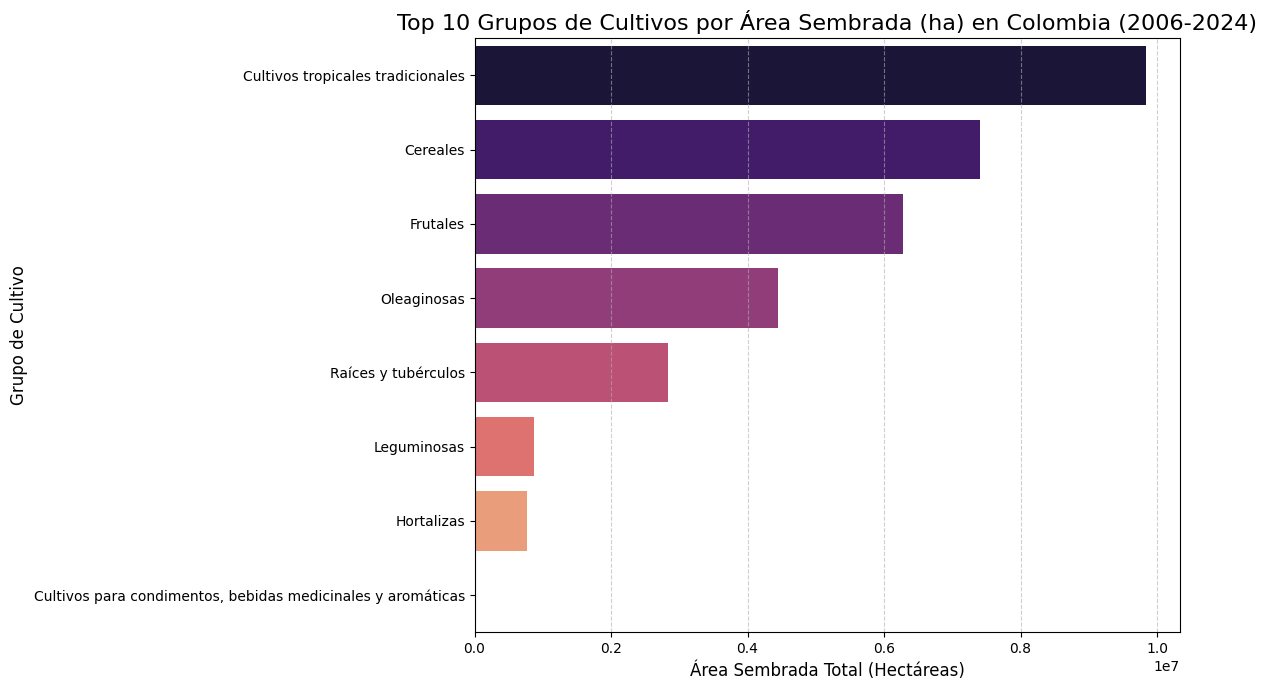


¡Análisis Exploratorio y Gráfico del Top 10 Completado!


In [12]:
import pandas as pd # Aseguramos que pandas esté importado
import matplotlib.pyplot as plt
import seaborn as sns

# ====================================================================
# CONFIGURACIÓN DE COLUMNAS (Nombres verificados por el usuario)
# ====================================================================
# Asumimos que el DataFrame df_datos ya existe en el entorno de Colab
# y that the column names are correct based on the concatenated dataframe.
COL_DEPARTAMENTO = 'Departamento' # Updated to match the column name in df_2024
COL_CULTIVO = 'Grupo cultivo' # Updated to match the column name in df_2024
COL_AREA_SEMBRADA = 'Área sembrada (ha)' # Updated to match the column name in df_2024 (with accent)

print("Iniciando el Análisis Exploratorio y Gráfico del Top 10...")

# 1. Asegurar que la columna de área sembrada sea numérica
# Esto es CRUCIAL. Si tiene comas o texto, el cálculo falla.
try:
    # Usamos errors='coerce' para convertir cualquier valor no numérico a NaN
    df_datos[COL_AREA_SEMBRADA] = pd.to_numeric(df_datos[COL_AREA_SEMBRADA], errors='coerce')
    print(f"Columna '{COL_AREA_SEMBRADA}' convertida a tipo numérico.")
except KeyError:
    print(f"Error: La columna '{COL_AREA_SEMBRADA}' no se encontró. ¡Verifica el nombre!")

# 2. Agrupar los datos para encontrar el área sembrada total por cada cultivo
# Sumamos el área sembrada por cada GRUPO DE CULTIVO.
# Eliminamos los valores NaN que se pudieron generar en la conversión a numérico.
top_cultivos = df_datos.dropna(subset=[COL_AREA_SEMBRADA]).groupby(COL_CULTIVO)[COL_AREA_SEMBRADA].sum()

# 3. Seleccionar los 10 cultivos con mayor área sembrada
top_10_cultivos = top_cultivos.nlargest(10)

print("\n" + "="*50)
print("CULTIVOS CON MAYOR ÁREA SEMBRADA A NIVEL NACIONAL (2006-2024)")
print("="*50)
# Muestra los datos del Top 10
print(top_10_cultivos.to_string(float_format="%.2f"))


# 4. Generación del Gráfico (Punto 8)
plt.figure(figsize=(12, 7))
sns.barplot(
    x=top_10_cultivos.values,
    y=top_10_cultivos.index,
    palette='magma' # Un esquema de color cálido y profesional
)

plt.title('Top 10 Grupos de Cultivos por Área Sembrada (ha) en Colombia (2006-2024)', fontsize=16)
plt.xlabel('Área Sembrada Total (Hectáreas)', fontsize=12)
plt.ylabel('Grupo de Cultivo', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout() # Ajusta el layout para que los nombres largos no se corten

# Muestra el gráfico en Colab
plt.show()

print("\n" + "="*50)
print("¡Análisis Exploratorio y Gráfico del Top 10 Completado!")
print("="*50)